# BT4012 Project: Model Building, Tuning, and Evaluation
### Completed by: Group 8

# Import Packages

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Initialize the evaluator
from model_evaluator import ModelEvaluator
evaluator = ModelEvaluator()

# Global Variables
RANDOM_STATE = 42

# Load Datasets & Basic EDA

#### Train set

In [31]:
train_df = pd.read_csv('../data/processed/train.csv')
train_df.head()

merchant_fraud_Abbott-Rogahn  merchant_fraud_Abbott-Steuber  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   merchant_fraud_Adams, Kovacek and Kuhlman  merchant_fraud_Adams-Barrows  \
0                                        0.0                           0.0   
1                                        0.0                           0.0   
2                                        0.0                           0.0   
3                                        0.0                           0.0   
4                                        0.0                           0.0   

   merchant_fraud_Altenwerth, Cartwright and Koss  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   

   merchant_fraud_Ankunding-Carroll  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   

   merchant_fraud_Armstrong, Walter and Gottlieb  merchant_fraud_Auer LLC  \
0                                            0.0                      0.0   
1                                            0.0                      0.0   
2                                            0.0                      0.0   
3                                            0.0                      0.0   
4                                            0.0                      0.0   

   merchant_fraud_Auer-Mosciski  merchant_fraud_Auer-West  \
0                           0.0                       1.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   merchant_fraud_Bahringer Group  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   merchant_fraud_Bahringer, Bergnaum and Quitzon  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   merchant_fraud_Bahringer, Osinski and Block  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   merchant_fraud_Bahringer, Schoen and Corkery  \
0                            

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232668 entries, 0 to 232667
Columns: 1688 entries, merchant_fraud_Abbott-Rogahn to is_fraud
dtypes: bool(1), float64(1671), int64(12), object(4)
memory usage: 2.9+ GB


In [33]:
train_df.describe()

merchant_fraud_Abbott-Rogahn  merchant_fraud_Abbott-Steuber  \
count                 232668.000000                  232668.000000   
mean                       0.000808                       0.001079   
std                        0.028414                       0.032827   
min                        0.000000                       0.000000   
25%                        0.000000                       0.000000   
50%                        0.000000                       0.000000   
75%                        0.000000                       0.000000   
max                        1.000000                       1.000000   

       merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
count                      232668.000000               232668.000000   
mean                            0.001036                    0.001341   
std                             0.032167                    0.036595   
min                             0.000000                    0.000000   
25%                             0.000000                    0.000000   
50%                             0.000000                    0.000000   
75%                             0.000000                    0.000000   
max                             1.000000                    1.000000   

       merchant_fraud_Adams, Kovacek and Kuhlman  \
count                              232668.000000   
mean                                    0.000640   
std                                     0.025298   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       merchant_fraud_Adams-Barrows  \
count                 232668.000000   
mean                       0.000692   
std                        0.026296   
min                        0.000000   
25%                        0.000000   
50%                        0.000000   
75%                        0.000000   
max                        1.000000   

       merchant_fraud_Altenwerth, Cartwright and Koss  \
count                                   232668.000000   
mean                                         0.002205   
std                                          0.046904   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
count                      232668.000000                 232668.000000   
mean                            0.001517                      0.002600   
std                             0.038922                      0.050927   
min                             0.000000                      0.000000   
25%                             0.000000                      0.000000   
50%                             0.000000                      0.000000   
75%                             0.000000                      0.000000   
max                             1.000000                      1.000000   

       merchant_fraud_Ankunding-Carroll  \
count                     232668.000000   
mean                           0.000503   
std                            0.022419   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                            1.000000   

       merchant_fraud_Armstrong, Walter and Gottlieb  merchant_fraud_Auer LLC  \
count                                  232668.000000            232668.000000   
mean                                        0.000907                 0.001057   
std                                         0.030101                 0.032499   
min          

#### Validation set

In [34]:
validation_df = pd.read_csv('../data/processed/validation.csv')
validation_df.head()

merchant_fraud_Abbott-Rogahn  merchant_fraud_Abbott-Steuber  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   merchant_fraud_Adams, Kovacek and Kuhlman  merchant_fraud_Adams-Barrows  \
0                                        0.0                           0.0   
1                                        0.0                           0.0   
2                                        0.0                           0.0   
3                                        0.0                           0.0   
4                                        0.0                           0.0   

   merchant_fraud_Altenwerth, Cartwright and Koss  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   

   merchant_fraud_Ankunding-Carroll  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   

   merchant_fraud_Armstrong, Walter and Gottlieb  merchant_fraud_Auer LLC  \
0                                            0.0                      0.0   
1                                            0.0                      0.0   
2                                            0.0                      0.0   
3                                            0.0                      0.0   
4                                            0.0                      0.0   

   merchant_fraud_Auer-Mosciski  merchant_fraud_Auer-West  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   merchant_fraud_Bahringer Group  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   merchant_fraud_Bahringer, Bergnaum and Quitzon  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   merchant_fraud_Bahringer, Osinski and Block  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   merchant_fraud_Bahringer, Schoen and Corkery  \
0                            

In [35]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 1688 entries, merchant_fraud_Abbott-Rogahn to is_fraud
dtypes: bool(1), float64(1671), int64(12), object(4)
memory usage: 386.2+ MB


In [36]:
validation_df.describe()

merchant_fraud_Abbott-Rogahn  merchant_fraud_Abbott-Steuber  \
count                  30000.000000                   30000.000000   
mean                       0.001267                       0.001367   
std                        0.035568                       0.036944   
min                        0.000000                       0.000000   
25%                        0.000000                       0.000000   
50%                        0.000000                       0.000000   
75%                        0.000000                       0.000000   
max                        1.000000                       1.000000   

       merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
count                       30000.000000                30000.000000   
mean                            0.001467                    0.001700   
std                             0.038270                    0.041197   
min                             0.000000                    0.000000   
25%                             0.000000                    0.000000   
50%                             0.000000                    0.000000   
75%                             0.000000                    0.000000   
max                             1.000000                    1.000000   

       merchant_fraud_Adams, Kovacek and Kuhlman  \
count                               30000.000000   
mean                                    0.000867   
std                                     0.029427   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       merchant_fraud_Adams-Barrows  \
count                  30000.000000   
mean                       0.001167   
std                        0.034137   
min                        0.000000   
25%                        0.000000   
50%                        0.000000   
75%                        0.000000   
max                        1.000000   

       merchant_fraud_Altenwerth, Cartwright and Koss  \
count                                    30000.000000   
mean                                         0.001467   
std                                          0.038270   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
count                       30000.000000                  30000.000000   
mean                            0.002300                      0.001033   
std                             0.047904                      0.032129   
min                             0.000000                      0.000000   
25%                             0.000000                      0.000000   
50%                             0.000000                      0.000000   
75%                             0.000000                      0.000000   
max                             1.000000                      1.000000   

       merchant_fraud_Ankunding-Carroll  \
count                      30000.000000   
mean                           0.000500   
std                            0.022355   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                            1.000000   

       merchant_fraud_Armstrong, Walter and Gottlieb  merchant_fraud_Auer LLC  \
count                                   30000.000000             30000.000000   
mean                                        0.001600                 0.001533   
std                                         0.039969                 0.039128   
min          

#### Test set

In [37]:
test_df = pd.read_csv('../data/processed/test.csv')
test_df.head()

merchant_fraud_Abbott-Rogahn  merchant_fraud_Abbott-Steuber  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   merchant_fraud_Adams, Kovacek and Kuhlman  merchant_fraud_Adams-Barrows  \
0                                        0.0                           0.0   
1                                        0.0                           0.0   
2                                        0.0                           0.0   
3                                        0.0                           0.0   
4                                        0.0                           0.0   

   merchant_fraud_Altenwerth, Cartwright and Koss  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   

   merchant_fraud_Ankunding-Carroll  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   

   merchant_fraud_Armstrong, Walter and Gottlieb  merchant_fraud_Auer LLC  \
0                                            0.0                      0.0   
1                                            0.0                      0.0   
2                                            0.0                      0.0   
3                                            0.0                      0.0   
4                                            0.0                      0.0   

   merchant_fraud_Auer-Mosciski  merchant_fraud_Auer-West  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   merchant_fraud_Bahringer Group  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   merchant_fraud_Bahringer, Bergnaum and Quitzon  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   merchant_fraud_Bahringer, Osinski and Block  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   merchant_fraud_Bahringer, Schoen and Corkery  \
0                            

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 1688 entries, merchant_fraud_Abbott-Rogahn to is_fraud
dtypes: bool(1), float64(1671), int64(12), object(4)
memory usage: 386.2+ MB


In [39]:
test_df.describe()

merchant_fraud_Abbott-Rogahn  merchant_fraud_Abbott-Steuber  \
count                  30000.000000                   30000.000000   
mean                       0.001833                       0.001700   
std                        0.042779                       0.041197   
min                        0.000000                       0.000000   
25%                        0.000000                       0.000000   
50%                        0.000000                       0.000000   
75%                        0.000000                       0.000000   
max                        1.000000                       1.000000   

       merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
count                       30000.000000                30000.000000   
mean                            0.001367                    0.001300   
std                             0.036944                    0.036033   
min                             0.000000                    0.000000   
25%                             0.000000                    0.000000   
50%                             0.000000                    0.000000   
75%                             0.000000                    0.000000   
max                             1.000000                    1.000000   

       merchant_fraud_Adams, Kovacek and Kuhlman  \
count                               30000.000000   
mean                                    0.000933   
std                                     0.030537   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       merchant_fraud_Adams-Barrows  \
count                  30000.000000   
mean                       0.001767   
std                        0.041995   
min                        0.000000   
25%                        0.000000   
50%                        0.000000   
75%                        0.000000   
max                        1.000000   

       merchant_fraud_Altenwerth, Cartwright and Koss  \
count                                    30000.000000   
mean                                         0.001367   
std                                          0.036944   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
count                       30000.000000                  30000.000000   
mean                            0.001967                      0.001533   
std                             0.044304                      0.039128   
min                             0.000000                      0.000000   
25%                             0.000000                      0.000000   
50%                             0.000000                      0.000000   
75%                             0.000000                      0.000000   
max                             1.000000                      1.000000   

       merchant_fraud_Ankunding-Carroll  \
count                      30000.000000   
mean                           0.000733   
std                            0.027071   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                            1.000000   

       merchant_fraud_Armstrong, Walter and Gottlieb  merchant_fraud_Auer LLC  \
count                                   30000.000000             30000.000000   
mean                                        0.001133                 0.001300   
std                                         0.033646                 0.036033   
min          

#### Splitting into X and y

In [40]:
# split train df, validation df, test df into each of their X and y
y_train = train_df.pop('is_fraud')
X_train = train_df

y_valid = validation_df.pop('is_fraud')
X_valid = validation_df

y_test = test_df.pop('is_fraud')
X_test = test_df

In [41]:
pd.set_option('display.max_columns', None)
cols = ['amt', 'city_pop', 'trans_hour', 'cluster', 'distance', 'merch_x', 'merch_y', 'merch_z', 'holder_x', 'holder_y', 'holder_z', 'time_since_last_trans', 'dist_from_last_trans', 'transaction_velocity']
X_train = X_train[cols]
X_valid = X_valid[cols]
X_test = X_test[cols]


In [42]:
X_train

amt  city_pop  trans_hour  cluster    distance   merch_x  \
0       0.000011  0.003459          23        0   36.668123 -0.112753   
1       0.000508  0.094947          15        1   30.912849  0.723755   
2       0.000631  0.000209          16        2  110.167370  0.849557   
3       0.005356  0.000045          10        2  115.759541  0.041922   
4       0.014015  0.024585           8        2   66.719244 -0.212297   
...          ...       ...         ...      ...         ...       ...   
232663  0.000378  0.000096           3        2   63.072792 -0.075138   
232664  0.056439  0.001468           3       52   91.891253 -0.396311   
232665  0.018976  0.000326          18        2   80.680497 -0.396357   
232666  0.075326  0.047089          23        2  113.809918 -0.000003   
232667  0.052319  0.001962          12        2  108.709134 -0.764629   

         merch_y   merch_z  holder_x  holder_y  holder_z  \
0      -0.060011 -0.991809 -0.370154 -0.099535 -0.923623   
1       0.084975  0.684805  0.551488 -0.030192  0.833636   
2       0.053062 -0.524822  0.902279  0.077069  0.424209   
3      -0.032360 -0.998597 -0.704018 -0.117726 -0.700357   
4      -0.674391  0.707196 -0.540307 -0.811216  0.223598   
...          ...       ...       ...       ...       ...   
232663  0.004644  0.997162  0.274911  0.128051  0.952905   
232664 -0.193024  0.897596  0.002726 -0.001273  0.999995   
232665  0.746106  0.535002 -0.959547  0.222718  0.172240   
232666 -0.000461 -1.000000  0.421540 -0.673235 -0.607502   
232667 -0.373284 -0.525359 -0.937355 -0.027568  0.347284   

        time_since_last_trans  dist_from_last_trans  transaction_velocity  
0                    0.000886             58.520431          2.378703e+08  
1                    0.003143            157.863973          1.807959e+08  
2                    0.005068            145.535748          1.033749e+08  
3                    0.016827             65.893971          1.409708e+07  
4                    0.000814            182.701433          8.082254e+08  
...                       ...                   ...                   ...  
232663               0.000000              0.000000          0.000000e+00  
232664               0.000000              0.000000          0.000000e+00  
232665               0.000000              0.000000          0.000000e+00  
232666               0.000000              0.000000          0.000000e+00  
232667               0.000000              0.000000          0.000000e+00  

[232668 rows x 14 columns]

# Model Building & Hyperparameter Tuning

### Steps
- Choose a model: LogisticRegression, RidgeClassifier, SGDClassifier, KNeighborsClassifier, SVC, GaussianNB, DecisionTreeClassifier, HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, XGBClassifier
- Fit the model to the train set
- Get model's predictions for the train and validation set
- Compare the accuracy scores for the validation set and train set to detect overfitting
- Do k-fold cross validation and hyperparameter tuning: GridSearchCV, RandomizedSearchCV
- Repeat the steps above for other models

#### Baseline Model 1 (DummyClassifier with 'uniform' strategy)
DummyClassifier with equal probability of predicting fraud and non-fraud

In [43]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [44]:
acc_train_dummy = dummy_clf.score(X_train, y_train)
acc_valid_dummy = dummy_clf.score(X_valid, y_valid)
print('Mean accuracy (train):', acc_train_dummy)
print('Mean accuracy (validation):', acc_valid_dummy)
print('Overfitted to train?', acc_train_dummy > acc_valid_dummy)

Mean accuracy (train): 0.4987449928653704
Mean accuracy (validation): 0.4993
Overfitted to train? False


#### Baseline Model 2 (DummyClassifier with 'prior' strategy)
DummyClassifier that will always predict the most frequent class label

In [45]:
dummy_clf1 = DummyClassifier(strategy="prior", random_state=42)
dummy_clf1.fit(X_train, y_train)

DummyClassifier(random_state=42)

In [46]:
acc_train_dummy1 = dummy_clf1.score(X_train, y_train)
acc_valid_dummy1 = dummy_clf1.score(X_valid, y_valid)
print('Mean accuracy (train):', acc_train_dummy1)
print('Mean accuracy (validation):', acc_valid_dummy1)
print('Overfitted to train?', acc_train_dummy1 > acc_valid_dummy1)

Mean accuracy (train): 0.5
Mean accuracy (validation): 0.9942
Overfitted to train? False


#### Stacking Classifier

In [47]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define base models
base_learners = [
    ('lr', LogisticRegression(max_iter=500)),
    ('gnb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE))
]

# Define meta-model (classifier to combine base models' predictions)
meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=base_learners, 
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=500)),
                               ('gnb', GaussianNB()),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

#### XGBoost

In [48]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,   # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    max_depth=3,        # Maximum depth of a tree
    random_state=RANDOM_STATE
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(
    n_estimators=50,           # Number of boosting rounds
    learning_rate=1,           # Learning rate
    random_state=RANDOM_STATE
)

adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

# Model Evaluation

### Steps
- Get a model's predictions for the test set
- From the test set predictions, compute scores for evaluation metrics such as Accuracy, Precision, Recall, F1-Score, ROC AUC
- Repeat the steps above for other models
- Consolidate the evaluation scores for all the models in a table for comparison
- Determine the best performing model for our project’s use case

#### Baseline Model 1 (DummyClassifier with 'uniform' strategy)
DummyClassifier with equal probability of predicting fraud and non-fraud

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# get test set predictions
y_testpred_dummy = dummy_clf.predict(X_test)

# compute scores for evaluation metrics: accuracy, precision, recall, f1-score, roc auc
acc_test_dummy = accuracy_score(y_test, y_testpred_dummy)
prec_test_dummy = precision_score(y_test, y_testpred_dummy)
recall_test_dummy = recall_score(y_test, y_testpred_dummy)
f1_test_dummy = f1_score(y_test, y_testpred_dummy)
auc_test_dummy = roc_auc_score(y_test, y_testpred_dummy)

metric_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
dummy_score_df = pd.DataFrame([[acc_test_dummy, prec_test_dummy, recall_test_dummy, f1_test_dummy, auc_test_dummy]], columns=metric_cols, index=['Baseline Model 1'])
display(dummy_score_df)




# --------------------------------------------------------------------------------
y_testpred_dummy_uniform = dummy_clf.predict(X_test)
y_testpred_prob_dummy_uniform = dummy_clf.predict_proba(X_test)[:, 1]

display(evaluator.evaluate_model(
    model_name="Baseline Model 1",
    y_actual=y_test,
    y_pred=y_testpred_dummy_uniform,
    y_pred_prob=y_testpred_prob_dummy_uniform,
    dataset_name="Test"
))

Accuracy  Precision    Recall  F1-Score   ROC AUC
Baseline Model 1  0.499367   0.003796  0.491379  0.007533  0.495388

Accuracy  Precision    Recall  F1-Score  ROC AUC  \
Baseline Model 1  0.499367   0.003796  0.491379  0.007533      0.5   

                  Average Precision  
Baseline Model 1           0.003867

#### Baseline Model 2 (DummyClassifier with 'prior' strategy)
DummyClassifier that will always predict the most frequent class label

In [51]:
# get test set predictions
y_testpred_dummy1 = dummy_clf1.predict(X_test)

# compute scores for evaluation metrics: accuracy, precision, recall, f1-score, roc auc
acc_test_dummy1 = accuracy_score(y_test, y_testpred_dummy1)
prec_test_dummy1 = precision_score(y_test, y_testpred_dummy1)
recall_test_dummy1 = recall_score(y_test, y_testpred_dummy1)
f1_test_dummy1 = f1_score(y_test, y_testpred_dummy1)
auc_test_dummy1 = roc_auc_score(y_test, y_testpred_dummy1)

dummy_score_df1 = pd.DataFrame([[acc_test_dummy1, prec_test_dummy1, recall_test_dummy1, f1_test_dummy1, auc_test_dummy1]], columns=metric_cols, index=['Baseline Model 2'])
display(dummy_score_df1)



# --------------------------------------------------------------------------------
y_testpred_dummy_prior = dummy_clf1.predict(X_test)
y_testpred_prob_dummy_prior = dummy_clf1.predict_proba(X_test)[:, 1]

display(evaluator.evaluate_model(
    model_name="Baseline Model 2",
    y_actual=y_test,
    y_pred=y_testpred_dummy_prior,
    y_pred_prob=y_testpred_prob_dummy_prior,
    dataset_name="Test"
))

Accuracy  Precision  Recall  F1-Score  ROC AUC
Baseline Model 2  0.996133        0.0     0.0       0.0      0.5

Accuracy  Precision  Recall  F1-Score  ROC AUC  \
Baseline Model 2  0.996133        0.0     0.0       0.0      0.5   

                  Average Precision  
Baseline Model 2           0.003867

#### Stacking Classifier

In [52]:
y_testpred_stacking = stacking_model.predict(X_test)
y_testpred_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="Stacking",
    y_actual=y_test,
    y_pred=y_testpred_stacking,
    y_pred_prob=y_testpred_prob_stacking,
    dataset_name="Test"
)

Accuracy  Precision    Recall  F1-Score   ROC AUC  Average Precision
Stacking  0.980933   0.097173  0.474138   0.16129  0.803068           0.056808

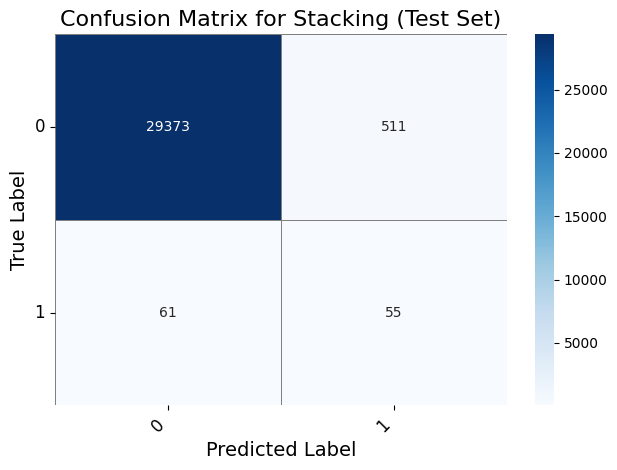

In [53]:
evaluator.plot_confusion_matrix(model_name='Stacking', dataset_name="Test")

#### XGBoost

In [54]:
y_testpred_xgb = xgb_model.predict(X_test)
y_testpred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
evaluator.evaluate_model(
    model_name="XGBoost",
    y_actual=y_test,
    y_pred=y_testpred_xgb,
    y_pred_prob=y_testpred_prob_xgb,
    dataset_name="Test"
)

Accuracy  Precision    Recall  F1-Score   ROC AUC  Average Precision
XGBoost    0.9763   0.079208  0.482759  0.136087  0.942418           0.098283

#### AdaBoost

In [55]:
y_testpred_adaboost = adaboost_model.predict(X_test)
y_testpred_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="AdaBoost",
    y_actual=y_test,
    y_pred=y_testpred_adaboost,
    y_pred_prob=y_testpred_prob_adaboost,
    dataset_name="Test"
)

Accuracy  Precision    Recall  F1-Score   ROC AUC  Average Precision
AdaBoost  0.973733   0.072519  0.491379  0.126386  0.939294           0.103572

### All Models on Test

In [56]:
evaluator.display_results(dataset_name="Test")

Model  Accuracy  Precision    Recall  F1-Score   ROC AUC  \
0  Baseline Model 1  0.499367   0.003796  0.491379  0.007533  0.500000   
1  Baseline Model 2  0.996133   0.000000  0.000000  0.000000  0.500000   
2          Stacking  0.980933   0.097173  0.474138  0.161290  0.803068   
3           XGBoost  0.976300   0.079208  0.482759  0.136087  0.942418   
4          AdaBoost  0.973733   0.072519  0.491379  0.126386  0.939294   

   Average Precision  
0           0.003867  
1           0.003867  
2           0.056808  
3           0.098283  
4           0.103572

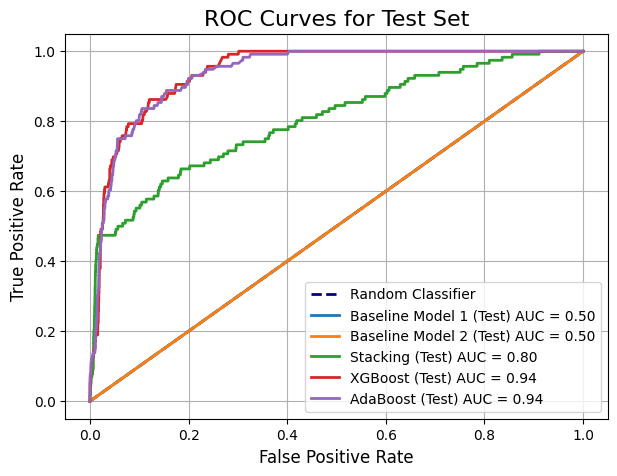

In [57]:
evaluator.plot_curves(curve_type='roc', dataset_name="Test")

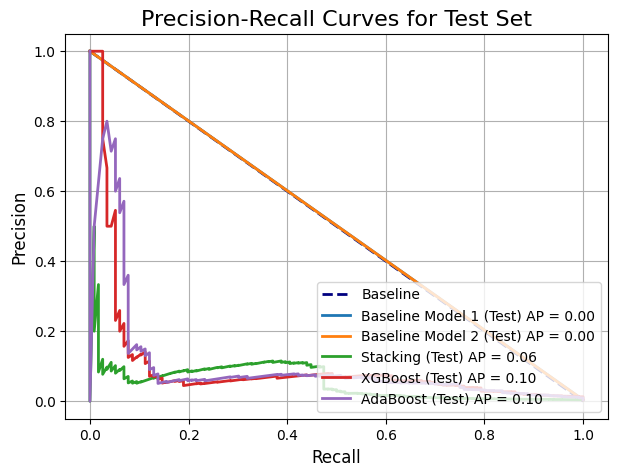

In [58]:
evaluator.plot_curves(curve_type='precision_recall', dataset_name="Test")